Install requirements

In [33]:
!pip install fastcore >/dev/null 2>&1
!pip install wandb >/dev/null 2>&1
!pip install ghapi >/dev/null 2>&1

Wandb login

In [107]:
import wandb
wandb.login()

True

Fetch sweep output data

In [108]:
import wandb,os
from fastcore.all import *
import pandas as pd

api = wandb.Api()

sweep_ids = [
    'eolecvka/fastai_timm/sweeps/ygh90vj4'
]
sweeps = concat(api.sweep(o).runs for o in sweep_ids)
summs = [{**r.summary, 'model_name':r.config['model_name']} for r in sweeps]

df = pd.DataFrame(summs)
df['dataset'] = 'planet'
df.loc[df['accuracy_multi'].isna(), 'dataset'] = 'pets'
df.loc[df['dataset']=='planet', 'accuracy'] = df.loc[df['dataset']=='planet', 'accuracy_multi']
df['error_rate'] = 1-df.accuracy

pd.set_option('display.max_columns', None)
# df

Build summary tables

In [109]:
# cols = ['dataset', 'model_name', 'GPU_mem', 'error_rate', 'valid_loss', 'train_loss', 'fit_time']
cols = ['model_name', 'dataset', 'fit_time', '_runtime', 'accuracy']

df_pets = df.loc[df['dataset']=='pets']
df_planets = df.loc[df['dataset']=='planet']

df_pets_top_models_acc = df_pets[columns].groupby(['model_name']).agg('max').sort_values('accuracy', ascending=False).dropna()
df_planets_top_models_acc =df_planets[columns].groupby(['model_name']).agg('max').sort_values('accuracy', ascending=False).dropna()

In [110]:
df_pets_top_models_acc.head()

,dataset,fit_time,_runtime,accuracy
model_name,,,,
swin_large_patch4_window7_224,pets,315.925706,323.0,0.968877
swin_large_patch4_window7_224_in22k,pets,316.881157,324.0,0.968877
swin_base_patch4_window7_224,pets,216.031795,222.0,0.966170
swin_small_patch4_window7_224,pets,179.834561,186.0,0.964141
vit_base_patch16_224,pets,140.045095,146.0,0.962788


In [111]:
df_planets_top_models_acc.head()

,dataset,fit_time,_runtime,accuracy
model_name,,,,
swin_large_patch4_window7_224_in22k,planet,52.546005,166.0,0.967059
swin_base_patch4_window7_224,planet,38.879868,59.0,0.965294
vit_base_patch16_224,planet,28.740349,95.0,0.965000
swin_base_patch4_window7_224_in22k,planet,39.011828,53.0,0.964706
swin_large_patch4_window7_224,planet,52.713881,77.0,0.964412


Visual analysis

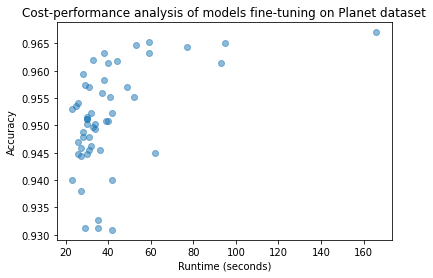

In [112]:
import numpy as np
import matplotlib.pyplot as plt

x = df_planets_top_models_acc._runtime.tolist()
y = df_planets_top_models_acc.accuracy.tolist()
plt.scatter(x, y, alpha=0.5)
plt.title("Cost-performance analysis of models fine-tuning on Planet dataset")
plt.xlabel("Runtime (seconds)")
plt.ylabel("Accuracy")
plt.show()

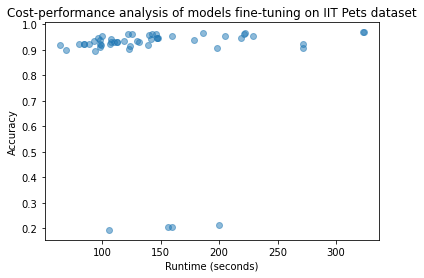

In [113]:
import numpy as np
import matplotlib.pyplot as plt

x = df_pets_top_models_acc._runtime.tolist()
y = df_pets_top_models_acc.accuracy.tolist()
plt.scatter(x, y, alpha=0.5)
plt.title("Cost-performance analysis of models fine-tuning on IIT Pets dataset")
plt.xlabel("Runtime (seconds)")
plt.ylabel("Accuracy")
plt.show()

???

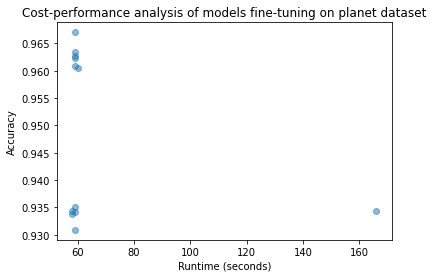

In [103]:
model_name = 'swin_large_patch4_window7_224_in22k'
dataset_name = 'planet'

model_finetuning_cost_perf = df.loc[
    (df['model_name']==model_name) &
    (df['dataset']==dataset_name)
]

import numpy as np
import matplotlib.pyplot as plt

x = model_finetuning_cost_perf._runtime.tolist()
y = model_finetuning_cost_perf.accuracy.tolist()
plt.scatter(x, y, alpha=0.5)
plt.title(f"Cost-performance analysis of models fine-tuning on {dataset_name} dataset")
plt.xlabel("Runtime (seconds)")
plt.ylabel("Accuracy")
plt.show()

Why does it look like this??

In [102]:
cols = ['accuracy', 'accuracy_multi']
model_finetuning_cost_perf

,train_loss,train_samples_per_sec,lr_0,eps_0,eps_1,sqr_mom_1,_timestamp,epoch,sqr_mom_0,valid_loss,wd_0,wd_1,mom_0,mom_1,accuracy,lr_1,_step,_runtime,raw_loss,error_rate,model_name,fit_time,model_family,GPU_mem,_wandb,fbeta_score,accuracy_multi,dataset
246,0.045024,124.176724,1.594899e-10,0.00001,0.00001,0.99,1.657208e+09,6.0,0.99,0.130556,0.01,0.01,0.949999,0.949999,0.964817,1.594899e-08,1103.0,322.0,0.128044,0.035183,swin_large_patch4_window7_224_in22k,315.049255,swin,10.462891,{'runtime': 323},NaN,NaN,pets
247,0.041803,123.195264,1.594899e-10,0.00001,0.00001,0.99,1.657208e+09,6.0,0.99,0.131292,0.01,0.01,0.949999,0.949999,0.965494,1.594899e-08,1103.0,324.0,0.007642,0.034506,swin_large_patch4_window7_224_in22k,316.881157,swin,10.455078,{'runtime': 325},NaN,NaN,pets
248,0.042099,123.352278,1.594899e-10,0.00001,0.00001,0.99,1.657208e+09,6.0,0.99,0.141334,0.01,0.01,0.949999,0.949999,0.962111,1.594899e-08,1103.0,324.0,0.134295,0.037889,swin_large_patch4_window7_224_in22k,316.597845,swin,10.458984,{'runtime': 325},NaN,NaN,pets
249,0.043783,123.965589,1.594899e-10,0.00001,0.00001,0.99,1.657207e+09,6.0,0.99,0.144168,0.01,0.01,0.949999,0.949999,0.959405,1.594899e-08,1103.0,323.0,0.022469,0.040595,swin_large_patch4_window7_224_in22k,315.575088,swin,10.482422,{'runtime': 324},NaN,NaN,pets
250,0.050021,123.637075,1.594899e-10,0.00001,0.00001,0.99,1.657207e+09,6.0,0.99,0.127953,0.01,0.01,0.949999,0.949999,0.968877,1.594899e-08,1103.0,323.0,0.064309,0.031123,swin_large_patch4_window7_224_in22k,315.830871,swin,10.476562,{'runtime': 324},NaN,NaN,pets
251,0.038389,123.671187,1.594899e-10,0.00001,0.00001,0.99,1.657207e+09,6.0,0.99,0.129708,0.01,0.01,0.949999,0.949999,0.964141,1.594899e-08,1103.0,323.0,0.029905,0.035859,swin_large_patch4_window7_224_in22k,315.728747,swin,10.476562,{'runtime': 324},NaN,NaN,pets


In [106]:
df.epoch.unique()

array([1.06521739, 6.        ,        nan, 0.32      ])